# Analysis

## Set-up data for the experiments

In [2]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,4.37,9.5,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,3.29,7.6,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,3.34,7.9,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,3.14,8.2,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,3.37,8.1,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,4.10,8.0,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,3.80,8.5,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0


### Check class counts

In [3]:
datamatrixDf.death_adm.value_counts()

death_adm
0    48221
1     8016
Name: count, dtype: int64

### Separate positive and negative classes

In [4]:
dataMatrixPositiveDf = datamatrixDf[datamatrixDf.death_adm == 1]
dataMatrixNegativeDf = datamatrixDf[datamatrixDf.death_adm == 0]

In [5]:
dataMatrixPositiveDf.shape, dataMatrixNegativeDf.shape

((8016, 125), (48221, 125))

In [6]:
dataMatrixPositiveDf.visit_occurrence_id.isin(dataMatrixNegativeDf.visit_occurrence_id).sum()

0

In [7]:
len(dataMatrixPositiveDf.visit_occurrence_id.unique()), len(dataMatrixNegativeDf.visit_occurrence_id.unique())

(1326, 9820)

In [8]:
totalSamples = 8016
dataSizeList = []
for proportion in [50, 55, 60, 65, 70, 75, 80, 85]:
    positiveSize = totalSamples
    negativeSize = int(totalSamples * proportion / (100 - proportion))
    label = str(proportion) + '_' + str(100 - proportion)
    dataSizeList.append([negativeSize, positiveSize, label])
dataSizeList.append([48221, 5358, '90_10'])
dataSizeList.append([48221, 2538, '95_05'])
dataSizeList


[[8016, 8016, '50_50'],
 [9797, 8016, '55_45'],
 [12024, 8016, '60_40'],
 [14886, 8016, '65_35'],
 [18704, 8016, '70_30'],
 [24048, 8016, '75_25'],
 [32064, 8016, '80_20'],
 [45424, 8016, '85_15'],
 [48221, 5358, '90_10'],
 [48221, 2538, '95_05']]

In [8]:
for [negativeSize, positiveSize, label] in dataSizeList:
    sampledDataMatrix = pd.concat([dataMatrixPositiveDf.sample(n=positiveSize), dataMatrixNegativeDf.sample(n=negativeSize)])
    sampledDataMatrix.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/04_class_ratio_analysis/datamatrix/data_matrix_ratio_' + label + '.csv', index=False)


## Run the analysis

In [4]:
import os


for [negativeSize, positiveSize, label] in dataSizeList:
    print('Ratio: ' + label)
    os.system(
        'cd ' + os.environ['EHR_ML_BASE'] + ';'
        +
        '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/04_class_ratio_analysis/datamatrix/data_matrix_ratio_''' + label + '''.csv -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(3) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/04_class_ratio_analysis/results/wb_0_wa_3_ratio_''' + label + '''.json;'''
        )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Read the results

### Define data directory

In [9]:
import os

dataDirName = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/04_class_ratio_analysis/results'''

### Load results in a DataFrame

In [10]:
import json
from pathlib import Path
import pandas as pd


data = []

for [negativeSize, positiveSize, label] in dataSizeList:
    scoresFile = Path(dataDirName, '''wb_0_wa_3_ratio_''' + label + '''.json''')
    if os.path.exists(scoresFile):
        with open(Path(scoresFile), 'rb') as f:
            results = json.load(f)
            aurocs = results['test_roc_auc']
            accuracies = results['test_accuracy']
            balanced_accuracies = results['test_balanced_accuracy']
            average_precisions = results['test_average_precision']
            f1_scores = results['test_f1']
            mccf1_scores = results['test_mccf1_score']
            data.append(['AUROC', int(label.split('_')[0]), sum(aurocs)/len(aurocs)])
            data.append(['Accuracy', int(label.split('_')[0]), sum(accuracies)/len(accuracies)])
            data.append(['Balanced Accuracy', int(label.split('_')[0]), sum(balanced_accuracies)/len(balanced_accuracies)])
            data.append(['Average Precision', int(label.split('_')[0]), sum(average_precisions)/len(average_precisions)])
            data.append(['F1 Scores', int(label.split('_')[0]), sum(f1_scores)/len(f1_scores)])
            data.append(['MCCF1 Scores', int(label.split('_')[0]), sum(mccf1_scores)/len(mccf1_scores)])
linePlotDf = pd.DataFrame(data, columns=['Metric', 'Ratio', 'Score'])

In [11]:
linePlotDf

,Metric,Ratio,Score
0,AUROC,50,0.915168
1,Accuracy,50,0.869758
2,Balanced Accuracy,50,0.825086
3,Average Precision,50,0.816050
4,F1 Scores,50,0.747991
5,MCCF1 Scores,50,0.785260
6,AUROC,55,0.907102
7,Accuracy,55,0.865162
8,Balanced Accuracy,55,0.801598
9,Average Precision,55,0.770982


In [16]:
linePlotDf.pivot(columns=['Metric'], index=['Ratio'], values=['Score'])

Score                                                          \
Metric     AUROC  Accuracy Average Precision Balanced Accuracy F1 Scores   
Ratio                                                                      
50      0.915168  0.869758          0.816050          0.825086  0.747991   
55      0.907102  0.865162          0.770982          0.801598  0.708555   
60      0.899230  0.870886          0.733815          0.774300  0.663013   
65      0.886391  0.876359          0.672774          0.747353  0.611757   
70      0.852907  0.864556          0.557341          0.671702  0.476290   
75      0.835462  0.865215          0.504110          0.639383  0.408133   
80      0.807204  0.870501          0.446774          0.618651  0.362662   
85      0.797770  0.881700          0.423282          0.612108  0.344551   
90      0.753720  0.896161          0.317223          0.568078  0.233256   
95      0.809695  0.932462          0.323920          0.584068  0.266657   

                     
Metric MCCF1 Scores  
Ratio                
50         0.785260  
55         0.754401  
60         0.720842  
65         0.681852  
70         0.576136  
75         0.523687  
80         0.489565  
85         0.477000  
90         0.392797  
95         0.422151

## Plot

<Figure size 1200x600 with 0 Axes>

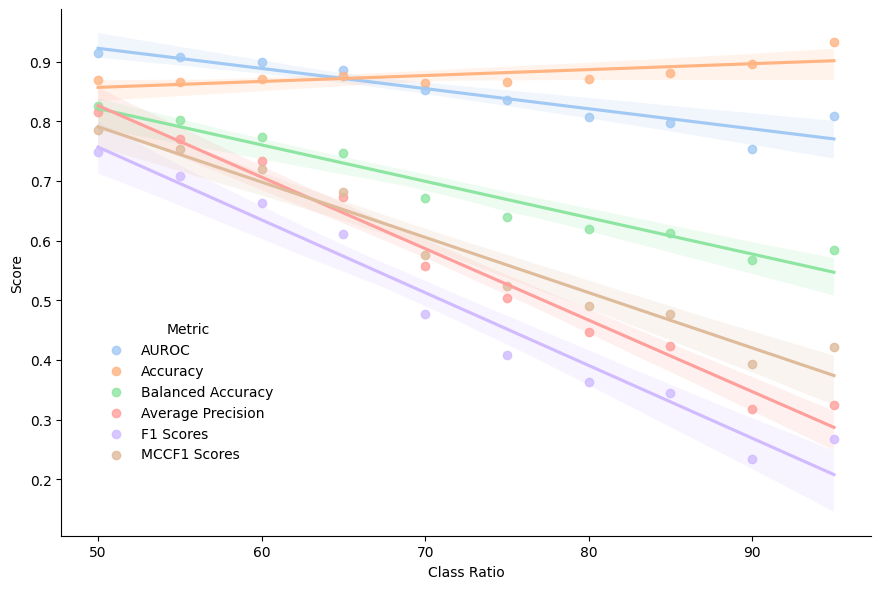

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lmplot(
    data=linePlotDf,
    x='Ratio',
    y='Score',
    hue='Metric',
    palette=sns.color_palette("pastel"),
    height=6,
    aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='Class Ratio')
ax.set(ylabel='Score')
sns.move_legend(ax, "lower left", bbox_to_anchor=(.1, .2))
plt.show()
